<a href="https://colab.research.google.com/github/ShvetsovEgor/ML/blob/main/hm_linear_models_tasks_2022_fall_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание - линейная регрессия

### Работа с признаками (8 баллов)

Скачайте датасет из материалов к уроку или по ссылке https://raw.githubusercontent.com/jupiterzhuo/travel-insurance/master/travel%20insurance.csv 


Описание признаков:

* Agency — название страхового агентства
* Agency Type — тип страхового агентства
* Distribution Channel — канал продвижения страхового агентства
* Product Name — название страхового продукта
* Duration — длительность поездки (количество дней)
* Destination — направление поездки
* Net Sales — сумма продаж 
* Commission (in value) — комиссия страхового агентства
* Gender — пол застрахованного
* Age — возраст застрахованного

Ответ:
* Claim — потребовалась ли страховая выплата: «да» — 1, «нет» — 0

Обработайте пропущенные значения и примените написанные функции onehot_encode() и minmax_scale().

**Подсказка**: маску для категориальных признаков можно сделать фильтром cat_features_mask = (df.dtypes == "object").values

In [173]:
import pandas as pd

In [174]:

df = pd.read_csv("https://raw.githubusercontent.com/jupiterzhuo/travel-insurance/master/travel%20insurance.csv", \
                    header=None, na_values=["?"], names=['Agency',
                                                        'Agency Type ',
                                                        'Distribution Channel',
                                                        'Product Name',
                                                        'Claim',
                                                        'Duration',
                                                        'Destination',
                                                        'Ne Salesа',
                                                        'Commission (in value)',
                                                        'Gender',
                                                        'Age'])
df.drop(index=df.index [0], axis= 0 , inplace= True )
df

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Ne Salesа,Commission (in value),Gender,Age
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29,9.57,F,81
2,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29,9.57,F,71
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.7,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
5,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41
...,...,...,...,...,...,...,...,...,...,...,...
63322,JZI,Airlines,Online,Basic Plan,No,111,JAPAN,35,12.25,M,31
63323,JZI,Airlines,Online,Basic Plan,No,58,CHINA,40,14,F,40
63324,JZI,Airlines,Online,Basic Plan,No,2,MALAYSIA,18,6.3,M,57
63325,JZI,Airlines,Online,Basic Plan,No,3,VIET NAM,18,6.3,M,63


In [177]:
df = df.fillna("F", limit=int(df.isnull().sum()[9] // 2))
df = df.fillna("M", limit=int(df.isnull().sum()[9] // 2))
df['Duration'] = df['Duration'].astype(int)
df['Ne Salesа'] = df['Ne Salesа'].astype(float)
df['Commission (in value)'] = df['Commission (in value)'].astype(float)
df['Age'] = df['Age'].astype(int)
df = df.loc[((df['Duration'] > 0) & (df['Duration'] < 1000))]
Y = np.where(df['Claim'] == 'Yes', 1,0)
df = df[["Duration", "Ne Salesа", "Commission (in value)", "Age"]]



df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 63246 entries, 1 to 63326
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Duration               63246 non-null  int64  
 1   Ne Salesа              63246 non-null  float64
 2   Commission (in value)  63246 non-null  float64
 3   Age                    63246 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 2.4 MB


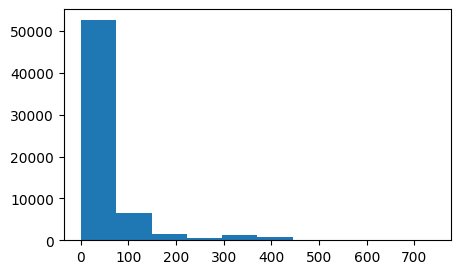

In [178]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 3))
plt.hist(df["Duration"], bins=10)
plt.show()


In [180]:
import numpy as np


def minmax_scale(X):
    a, b = X.max(axis=0), X.min(axis=0)
    if (a == b).all():
        x_std = X * 0.
    else:
        x_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    return x_std

In [181]:
df = minmax_scale(df)
df

,Duration,Ne Salesа,Commission (in value),Age
1,0.250338,0.300250,0.033757,0.686441
2,0.250338,0.300250,0.033757,0.601695
3,0.086604,0.283153,0.104762,0.271186
4,0.079838,0.291410,0.083810,0.271186
5,0.105548,0.307923,0.041905,0.347458
...,...,...,...,...
63322,0.148850,0.353628,0.043210,0.262712
63323,0.077131,0.357798,0.049383,0.338983
63324,0.001353,0.339450,0.022222,0.483051
63325,0.002706,0.339450,0.022222,0.533898


Подробный анализ и подготовка датасета часто помогают улучшить качество модели. Ниже представлено несколько идей преобразований. Вы можете применить одно или несколько из этих преобразований (а можете не применять), чтобы помочь будущей модели. 

1. *Посмотрите* *на количественные признаки. Возможно, в некоторых признаках есть выбросы - значения, которые сильно выбиваются. Такие значения полезно удалять. Советуем присмотреться к колонке Duration)*

2.*Можно заметить, что one hot encoding сильно раздувает количество столбцов. Радикальное решение - можно попробовать выбросить все категориальные признаки из датасета.*

3. Если все-таки оставляете категориальные признаки, то подумайте, как уменьшить количество столбцов после one hot encoding. Признаки с большим количеством значений (Duration - 149! разных стран) можно удалить или попробовать сгруппировать некоторые значения.

4. Downsampling. Датасет достаточно большой, разница в классах огромная. Можно уменьшить число наблюдений с частым ответом.

### Применение линейной регрессии (10 баллов)

Это задача классификации, но её можно решить с помощью линейной регрессии, если округлять предсказанный ответ до целого и выбирать ближайший по значению ответ из множества {0, 1}.

Вынесите признак 'Claim' в вектор ответов и разделите датасет на обучающую и тестовую выборку в соотношении 80 к 20. Зафиксируйте random_state.

**Подсказка:** быстро перевести Yes/No в 1/0 можно так - np.where(df['Claim'] == 'Yes', 1,0)

In [171]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [182]:
# разделение на test/train
X = df
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8)

Найдите аналитическое решение для обучающей выборки: обычное и регуляризацией l2. <br>
Аналитическое решение <br>
$$w^* = (X^TX)^{-1}X^Ty$$<br>
Аналитическое решение с L2 регуляризацией<br>
$$\hat{w} = (X^TX + \lambda^2E)^{-1}X^Ty$$

In [183]:
y = y_train
value = np.dot(np.dot(np.linalg.inv(np.dot(X_train.T, X_train)), X_train.T), y)
value

array([ 0.07951684,  0.05294671,  0.09985549, -0.03639051])

In [184]:
# посчитать аналитическое решение с регуляризацией
lambda_ = 1
n, k = X.shape
E = np.eye(k)
value_l2 = np.linalg.inv(X_train.T @ X_train + lambda_ * lambda_ * E) @ X_train.T @ y
value_l2

0    0.079509
1    0.052896
2    0.099463
3   -0.036297
dtype: float64

Постройте модель LinearRegression, примените к тестовой выборке и посчитайте MSE (можно использовать библиотеку sklearn)

In [190]:
# обучите модель линейной регрессии LinearRegression на обучающей выборке, примените к тестовой
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
predict = pred.round()

print(pred)
print(predict)

[0.00630356 0.08735776 0.01374819 ... 0.02538752 0.01053846 0.07281152]
[0. 0. 0. ... 0. 0. 0.]


In [191]:
# посчитайте MSE, предварительно округлив предсказанные ответы до целого
mse = mean_squared_error(y_test, predict)
mse

0.014782608695652174

### Вывод (1 балла)

Напишите краткий вывод по заданию (достаточно пары предложений). Расскажите, какие способы предобработки данных вы выбрали и почему. Насколько хороша ваша модель?

## Изучив датасет, я принял решение убрать категорийные признаки, так как они порождали за собой большое количество столбцов. Для оставшихся числовых признаков применил масштабирование MinMaxScaler, предварительно убрав объекты, выделяющиеся от остальных по фиче Duration 